# Практическая работа №4. Сравнение FoldX и RFDesign для стабилизации структуры

# Часть 1. FoldX

In [ ]:
 ! pip install gdown
 ! gdown 1pcCLcJkFEHlK9HOzSyNSZ8W4Id4GKyP4
 ! unzip  foldx5_1Linux64.zip
 ! mkdir -p /opt/foldx ; mv  foldx_20251231 molecules /opt/foldx
 ! chmod +x /opt/foldx/foldx_20251231
 ! pip install pyfoldx


Downloading...
From (original): https://drive.google.com/uc?id=1pcCLcJkFEHlK9HOzSyNSZ8W4Id4GKyP4
From (redirected): https://drive.google.com/uc?id=1pcCLcJkFEHlK9HOzSyNSZ8W4Id4GKyP4&confirm=t&uuid=bb63d396-2480-484b-bcc4-daf19cf907f8
To: /content/foldx5_1Linux64.zip
100% 32.0M/32.0M [00:00<00:00, 70.4MB/s]
Archive:  foldx5_1Linux64.zip
  inflating: foldx_20251231          
   creating: molecules/
  inflating: molecules/6HA.json      
  inflating: molecules/6HT.json      
  inflating: molecules/UMe.json      
  inflating: molecules/AMe.json      
  inflating: molecules/RG.json       
  inflating: molecules/CMe.json      
  inflating: molecules/U.json        
  inflating: molecules/RU.json       
  inflating: molecules/GMe.json      
  inflating: molecules/6HG.json      
  inflating: molecules/RA.json       
  inflating: molecules/TTP.json      
  inflating: molecules/RC.json       
  inflating: molecules/6HC.json      
  inflating: molecules/DU.json       
 extracting: yasaraPlugin.zip  

In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 643.2 kB/s eta 0:00:00


In [ ]:
!pip install py3Dmol

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from IPython.display import HTML
import py3Dmol
import os
os.environ['FOLDX_BINARY'] = '/opt/foldx/foldx_20251231'
from pyfoldx.structure import Structure
import pandas as pd
from Bio.PDB import PDBIO
import tempfile
import os

In [ ]:
! wget https://files.rcsb.org/download/1L2Y.pdb

--2025-10-17 10:33:30--  https://files.rcsb.org/download/1L2Y.pdb
Resolving files.rcsb.org (files.rcsb.org)... 13.33.45.71, 13.33.45.91, 13.33.45.56, ...
Connecting to files.rcsb.org (files.rcsb.org)|13.33.45.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1L2Y.pdb’

1L2Y.pdb                [ <=>                ] 936.72K  --.-KB/s    in 0.008s  

2025-10-17 10:33:30 (120 MB/s) - ‘1L2Y.pdb’ saved [959202]



In [ ]:
#!awk '/^MODEL .*/ {model++} model < 2 {print} /^ENDMDL/ && model == 1 {exit}' 1L2Y.pdb > 1L2Y_single_model.pdb
# Просто в блокноте отредактировала, убрала все остальные модели

In [ ]:
!grep "MODEL" 1L2Y.pdb

REMARK 210  SPECTROMETER MODEL             : DRX                                
REMARK 500 THAN 6*RMSD (M=MODEL NUMBER; RES=RESIDUE NAME; C=CHAIN               
REMARK 500 (M=MODEL NUMBER; RES=RESIDUE NAME; C=CHAIN IDENTIFIER;               
MODEL        1                                                                  


In [ ]:
st=Structure("1L2Y",'1L2Y.pdb')
st.getTotalEnergy()
res_df=st.getResiduesEnergy()
res_df['total']=res_df['total'].apply(float)
res_df

Computing total energy for structure...
Energy computed.
Computing residue energy for structure...
Energy computed.


,,,omega,phi,psi,sec_struct,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,...,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
Code,Mol,Pos,,,,,,,,,,,,,,,,,,,,,
ASN,A,1,-9999,-9999,-56.1449,*,0.851413,-0.6315,0,-0.319411,-0.0153797,1.21184,...,0,0.135429,0.1742,0,0,0,0,0,0,0
LEU,A,2,176.734,-43.98,-51.3088,n,1.712040,0,0,-0.461488,0,1.40147,...,0,0.0068561,0.435395,0.115048,0,0,0,0,0,0
TYR,A,3,178.886,-66.4659,-30.898,a,0.049181,-0.671744,0,-1.31971,0.126045,1.52446,...,0,1.99029e-05,0.910528,0,0,0,0,0,0,0
ILE,A,4,174.896,-65.2194,-45.9447,a,0.699966,-0.6315,0,-0.755596,0,1.36742,...,0,0,1.09716,0,0,0,0,0,0,0
GLN,A,5,175.833,-64.7466,-30.3463,a,0.893276,-0.6315,-0.846604,-0.759977,0,1.49856,...,0,0,1.14526,0,0,0,0,0,0,0
TRP,A,6,171.539,-73.1356,-43.4246,a,-1.625320,0,-0.538467,-2.474,0.142294,2.49372,...,0,0,0.996217,0,0,0,0,0,0,0
LEU,A,7,177.521,-64.8821,-43.2545,a,-0.883045,-1.21221,0,-0.961611,0,1.05203,...,0,0,1.35013,0,0,0,0,0,0,0
LYS,A,8,-178.858,-59.5087,-25.6982,a,0.441358,-0.6315,-0.846604,-0.645708,-0.0973837,0.83015,...,0,0.00164488,0.887563,0,0,0,0,0,0,0
ASP,A,9,174.287,-77.9894,-8.82305,c,2.826520,0,0,-0.682744,-0.439134,2.51462,...,0,0.000461751,0.811491,0.166571,0,0,0,0,0,0


In [ ]:
stRepaired=st.repair()
print( "Original Structure energy" )
print( float(st.getTotalEnergy().total) )
print( "Repaired Structure energy" )
print( float(stRepaired.getTotalEnergy().total) )


Repairing structure...
Structure repaired.
Original Structure energy
Computing total energy for structure...
Energy computed.
12.3856
Repaired Structure energy
Computing total energy for structure...


/tmp/ipython-input-65174907.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print( float(st.getTotalEnergy().total) )


Energy computed.
7.77633


/tmp/ipython-input-65174907.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print( float(stRepaired.getTotalEnergy().total) )


In [ ]:
df = pd.DataFrame(stRepaired.getResiduesEnergy(consider_waters=True)[["total"]])
df['total'] = df['total'].astype('float')
df

Computing residue energy for structure...
Energy computed.


,,,total
Code,Mol,Pos,
ASN,A,1,0.489642
LEU,A,2,1.831580
TYR,A,3,0.076126
ILE,A,4,0.594905
GLN,A,5,0.741906
TRP,A,6,-1.815540
LEU,A,7,-1.215690
LYS,A,8,0.251526
ASP,A,9,1.204560


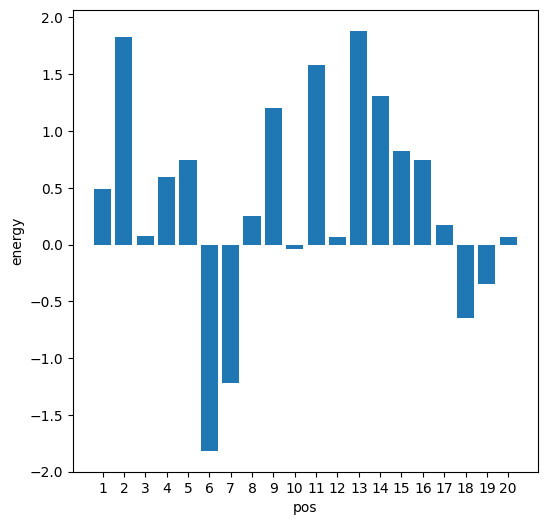

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(df.index.get_level_values(2), df['total'])

ax.set_xlabel('pos')
ax.set_ylabel('energy')

plt.show()

In [ ]:
df_maxsc = df[df['total'] >= 1.1]
df_maxsc

total
Code Mol Pos         
LEU  A   2    1.83158
ASP  A   9    1.20456
GLY  A   11   1.58201
SER  A   13   1.88344
         14   1.30666

In [ ]:
pos_to_mutate = np.array([2, 9, 11, 13])

In [ ]:
mut_df=stRepaired.positionScan(positions=pos_to_mutate, chain='A')
mut_df

Performing PSSM...
PSSM finished.


,L2,D9,G11,S13
A,4.674990e-01,9.283070e-01,2.026380e+00,2.329550e-01
C,7.105430e-15,-3.552710e-15,7.105430e-15,-1.421090e-14
D,7.105430e-15,3.552710e-15,1.065810e-14,-1.421090e-14
E,3.552710e-15,-3.552710e-15,3.552710e-15,-1.421090e-14
F,0.000000e+00,7.105430e-15,7.105430e-15,-1.421090e-14
G,-3.655860e-01,-1.923240e-01,-2.026380e+00,2.294070e-02
H,3.766620e-01,1.962200e-01,2.026380e+00,-2.794240e-02
I,7.105430e-15,-1.776360e-14,7.105430e-15,0.000000e+00
K,7.105430e-15,-1.065810e-14,1.065810e-14,0.000000e+00
L,0.000000e+00,-1.065810e-14,3.552710e-15,3.552710e-15


In [ ]:
mut_df.describe()

,L2,D9,G11,S13
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,2.392875e-02,4.661015e-02,1.013190e-01,1.139766e-02
std,1.593789e-01,2.168913e-01,7.984636e-01,5.280398e-02
min,-3.655860e-01,-1.923240e-01,-2.026380e+00,-2.794240e-02
25%,6.217250e-15,-1.065810e-14,3.552710e-15,-6.217258e-15
50%,7.105430e-15,-1.065810e-14,3.552710e-15,0.000000e+00
75%,7.105430e-15,-3.552710e-15,7.105430e-15,3.552710e-15
max,4.674990e-01,9.283070e-01,2.026380e+00,2.329550e-01


Выбираем минимальные по dG замены:

In [ ]:
mutations = ['LA2G', 'DA9G', 'GA11S', 'SA13H']

mut_df, mut_ens, wt_ens = stRepaired.mutate(','.join(mutations)+';',number_of_runs=5)

Computing mutation(s) LA2G,DA9G,GA11S,SA13H; on target structure...
Energy computed.


In [ ]:
mut_df

,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,...,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
1L2Y_Repaired_LA2G_DA9G_GA11S_SA13H_0,3.0516,0.613027,2.58932,1.1506,0.86817,-3.44234,1.06823,1.53301,-2.18447,1.04916,...,0,-0.0358604,-0.466142,-0.157234,0,0,0,0,0,0
1L2Y_Repaired_LA2G_DA9G_GA11S_SA13H_1,1.77636e-14,0,0,3.55271e-15,0,0,1.77636e-15,-4.44089e-16,8.88178e-16,3.55271e-15,...,0,6.93889e-18,1.77636e-15,0,0,0,0,0,0,0
1L2Y_Repaired_LA2G_DA9G_GA11S_SA13H_2,7.10543e-15,0,0,3.55271e-15,0,0,3.55271e-15,-4.44089e-16,0,0,...,0,1.38778e-17,0,0,0,0,0,0,0,0
1L2Y_Repaired_LA2G_DA9G_GA11S_SA13H_3,5.32907e-15,0,0,3.55271e-15,0,0,3.55271e-15,-4.44089e-16,0,0,...,0,1.38778e-17,3.55271e-15,0,0,0,0,0,0,0
1L2Y_Repaired_LA2G_DA9G_GA11S_SA13H_4,7.10543e-15,0,0,3.55271e-15,0,0,3.55271e-15,-4.44089e-16,0,0,...,0,1.38778e-17,0,0,0,0,0,0,0,0


In [ ]:
mut_frame1 = mut_ens.getFrame(0)
wt_frame1 = wt_ens.getFrame(0)
import os
cwd = os.getcwd()

In [ ]:
mut_ens.getFrame(0).toPdbFile(os.path.join(cwd, 'mutant_1.pdb'))
wt_ens.getFrame(0).toPdbFile(os.path.join(cwd, 'wildtype_1.pdb'))

Выведу белок с 4 изменениями и исходный белок:

In [ ]:
with open("mutant_1.pdb", 'r') as f:
    mutant_data = f.read()

with open("wildtype_1.pdb", 'r') as f:
    wt_data = f.read()

view = py3Dmol.view(width=800, height=600, viewergrid=(1,2))

# Мутант - слева
view.addModel(mutant_data, 'pdb', viewer=(0,0))
view.setStyle({'model': -1}, {'stick': {'radius': 0.1}}, viewer=(0,0))
view.addStyle({'resi': 2}, {'stick': {'radius': 0.3, 'color': 'pink'}}, viewer=(0,0))
view.addStyle({'resi': 9}, {'stick': {'radius': 0.3, 'color': 'pink'}}, viewer=(0,0))
view.addStyle({'resi': 11}, {'stick': {'radius': 0.3, 'color': 'pink'}}, viewer=(0,0))
view.addStyle({'resi': 13}, {'stick': {'radius': 0.3, 'color': 'pink'}}, viewer=(0,0))

view.addLabel("MUTANT", {'position': {'x': 0, 'y': 0}, 'backgroundColor': 'black'}, viewer=(0,0))

# WT - справа
view.addModel(wt_data, 'pdb', viewer=(0,1))
view.setStyle({'model': -1}, {'stick': {'radius': 0.1}}, viewer=(0,1))
view.addStyle({'resi': 2}, {'stick': {'radius': 0.3, 'color': 'cyan'}}, viewer=(0,1))
view.addStyle({'resi': 9}, {'stick': {'radius': 0.3, 'color': 'cyan'}}, viewer=(0,1))
view.addStyle({'resi': 11}, {'stick': {'radius': 0.3, 'color': 'cyan'}}, viewer=(0,1))
view.addStyle({'resi': 13}, {'stick': {'radius': 0.3, 'color': 'cyan'}}, viewer=(0,1))
view.addLabel("WILD-TYPE", {'position': {'x': 0, 'y': 0}, 'backgroundColor': 'black'}, viewer=(0,1))

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.